# ANÁLISIS EXPLORATORIO DE DATOS

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


In [15]:
eda = pd.read_csv('Wine_reviews_climate_prediction.csv')

In [16]:
eda.head(2)

,Unnamed: 0,country,description,points,price,taster_name,variety,winery,Year,region,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
0,0,Portugal,This is ripe and fruity a wine that is smooth ...,87,15.0,Roger Voss,Portuguese Red,Quinta dos Avidagos,2011,Douro,41.453397,-5.125201,41.25,-5.25,13.1,19.7,6.57,298.7,1206
1,1,Portugal,Strong tannins dominate this wine. It comes fr...,85,NaN,Roger Voss,Portuguese Red,Quinta do Filoco,2011,Douro,41.453397,-5.125201,41.25,-5.25,13.1,19.7,6.57,298.7,1206


In [17]:
eda.drop(columns = 'Unnamed: 0', inplace = True)

In [18]:
eda.describe()

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
count,65838.000000,60311.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000,65838.000000
mean,88.352897,37.008655,2009.080956,32.945216,-38.770990,32.974764,-38.782542,12.944409,18.396368,7.535872,820.700068,1013.109040
std,3.161727,42.113959,2.616905,24.915822,67.148066,24.929384,67.147257,3.551747,3.868834,3.749604,402.676102,232.051532
min,80.000000,4.000000,2000.000000,-45.129986,-124.764732,-45.250000,-124.750000,-0.630000,1.990000,-6.620000,0.000000,351.000000
25%,86.000000,18.000000,2007.000000,37.123224,-118.339346,37.250000,-118.250000,10.980000,16.150000,5.830000,573.400000,864.000000
50%,88.000000,28.000000,2010.000000,41.213798,-6.047443,41.250000,-6.250000,13.280000,18.340000,7.200000,758.500000,1008.000000
75%,91.000000,45.000000,2011.000000,45.344425,7.942845,45.250000,7.750000,14.480000,20.530000,9.590000,992.600000,1176.000000
max,100.000000,2500.000000,2012.000000,59.941208,178.356201,59.750000,178.250000,28.650000,34.900000,24.310000,4114.000000,2370.000000


In [19]:
eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65838 entries, 0 to 65837
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         65838 non-null  object 
 1   description     65838 non-null  object 
 2   points          65838 non-null  int64  
 3   price           60311 non-null  float64
 4   taster_name     65838 non-null  object 
 5   variety         65838 non-null  object 
 6   winery          65838 non-null  object 
 7   Year            65838 non-null  int64  
 8   region          65838 non-null  object 
 9   Latitude        65838 non-null  float64
 10  Longitude       65838 non-null  float64
 11  Lat_x           65838 non-null  float64
 12  Long_x          65838 non-null  float64
 13  temp_anual      65838 non-null  float64
 14  temp_max_anual  65838 non-null  float64
 15  temp_min_anual  65838 non-null  float64
 16  pre_anual       65838 non-null  float64
 17  etp_anual       65838 non-null 

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

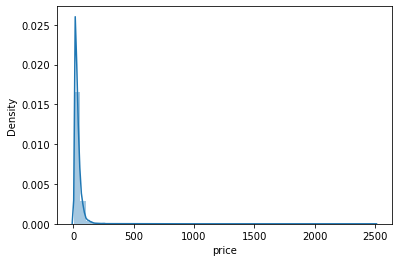

In [20]:
sns.distplot(eda.price)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='points', ylabel='Density'>

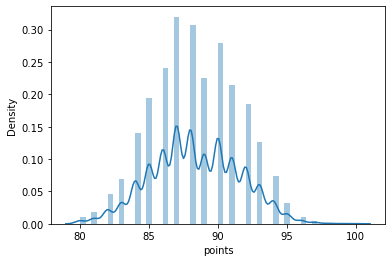

In [21]:
sns.distplot(eda.points)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

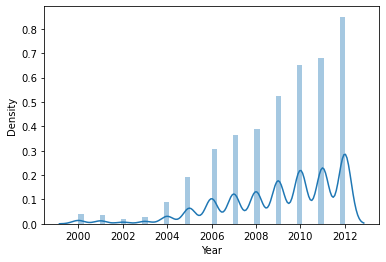

In [22]:
sns.distplot(eda.Year)

[Text(0, 0.5, 'country')]

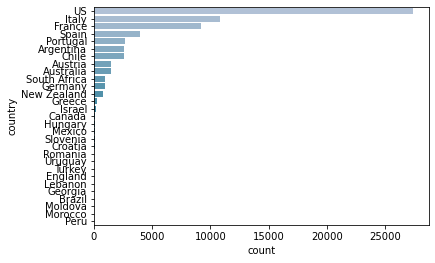

In [23]:
plot_data = eda.groupby('country').filter(lambda x : len(x)>10)
Appellation_Reg = sns.countplot(y="country",
                                data=plot_data, palette="PuBuGn_d", order = plot_data['country'].value_counts().index);
Appellation_Reg.set(ylabel='country')

[Text(0, 0.5, 'taster_name')]

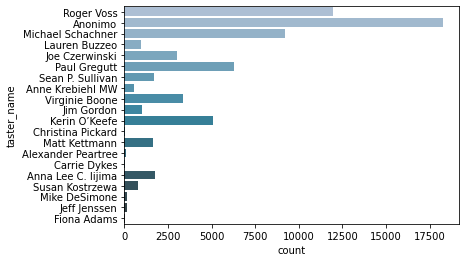

In [24]:
Appellation_Reg = sns.countplot(y="taster_name",  
data=eda, palette="PuBuGn_d");  
Appellation_Reg.set(ylabel='taster_name') 

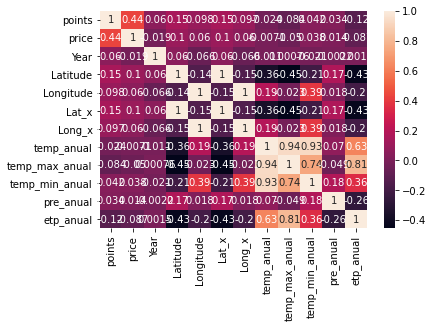

In [25]:
corrMatrix = eda.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [29]:
corrMatrix

,points,price,Year,Latitude,Longitude,Lat_x,Long_x,temp_anual,temp_max_anual,temp_min_anual,pre_anual,etp_anual
points,1.000000,0.436009,0.059932,0.152750,0.097693,0.152776,0.097452,-0.023812,-0.084411,0.042031,0.033735,-0.122775
price,0.436009,1.000000,-0.018538,0.103496,0.059879,0.103433,0.059737,-0.007076,-0.049646,0.037607,0.013966,-0.087069
Year,0.059932,-0.018538,1.000000,0.060108,-0.066282,0.060241,-0.066305,-0.010876,0.000759,-0.021435,-0.002235,0.001491
Latitude,0.152750,0.103496,0.060108,1.000000,-0.144752,0.999985,-0.145218,-0.358238,-0.454592,-0.209942,0.174396,-0.429367
Longitude,0.097693,0.059879,-0.066282,-0.144752,1.000000,-0.145010,0.999997,0.191695,-0.022913,0.387044,0.018355,-0.197699
Lat_x,0.152776,0.103433,0.060241,0.999985,-0.145010,1.000000,-0.145477,-0.358254,-0.454523,-0.210045,0.174686,-0.429255
Long_x,0.097452,0.059737,-0.066305,-0.145218,0.999997,-0.145477,1.000000,0.191828,-0.022668,0.387046,0.018129,-0.197495
temp_anual,-0.023812,-0.007076,-0.010876,-0.358238,0.191695,-0.358254,0.191828,1.000000,0.935254,0.930865,0.069743,0.628763
temp_max_anual,-0.084411,-0.049646,0.000759,-0.454592,-0.022913,-0.454523,-0.022668,0.935254,1.000000,0.741274,-0.049158,0.809914
temp_min_anual,0.042031,0.037607,-0.021435,-0.209942,0.387044,-0.210045,0.387046,0.930865,0.741274,1.000000,0.182636,0.356104


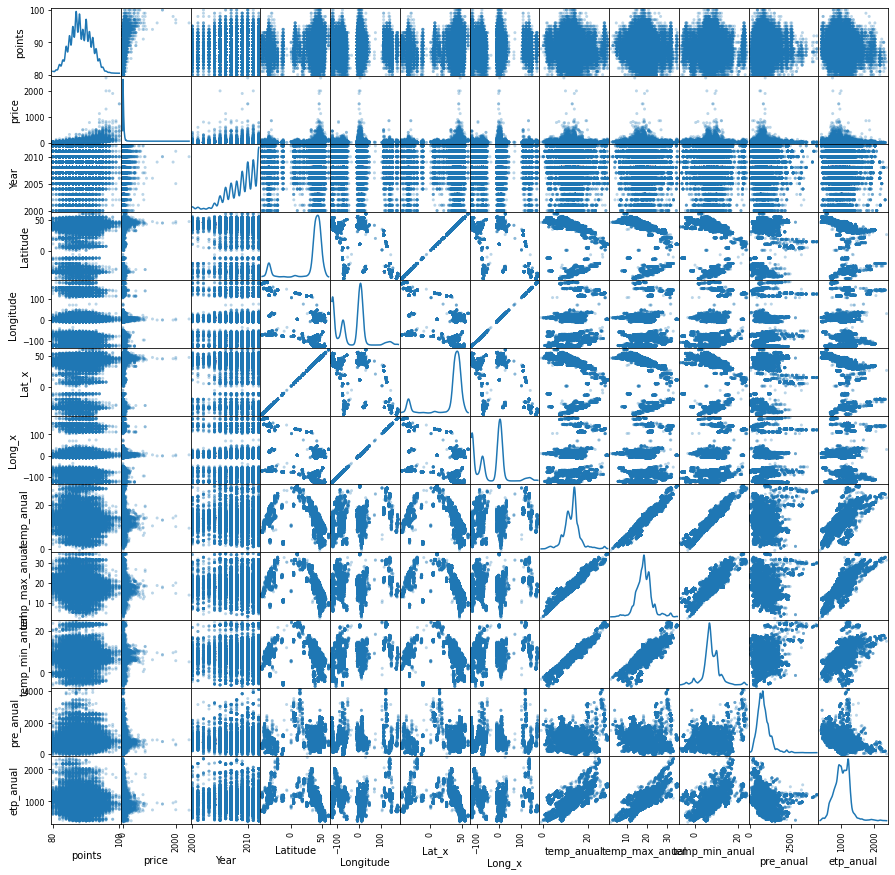

In [30]:
pd.plotting.scatter_matrix(eda, alpha = 0.3, figsize = (15,15), diagonal = 'kde');

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Latitude', ylabel='Density'>

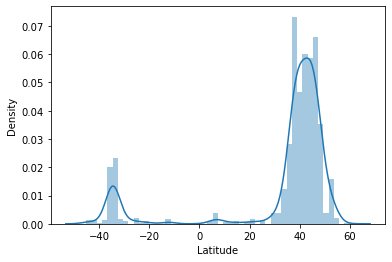

In [27]:
sns.distplot(eda.Latitude)

C:\Users\isabe\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Longitude', ylabel='Density'>

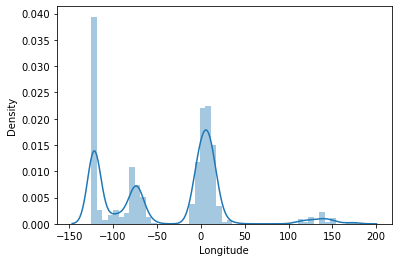

In [28]:
sns.distplot(eda.Longitude)

In [ ]:
#HISTOGRAMAS NORMALIZADOS

In [ ]:
sns.distplot(eda.temp_anual)

In [ ]:
sns.distplot(eda.temp_max_anual)

In [ ]:
sns.distplot(eda.temp_min_anual)

In [ ]:
sns.distplot(eda.etp_anual)